## Draw plots for datasets
Methods and parameters for drawing plots that represent time series data form given datasets.

In [ ]:
#default_exp data.datasets.plots

In [ ]:
#export
import numpy as np
import matplotlib.pyplot as plt

import pylab as plt
from pylab import rcParams
plt.style.use('seaborn-whitegrid')

from matplotlib import rcParams
plt.rcParams['font.family'] = 'serif'

FONTSIZE = 22

COLOR_PALLETE = ['#C0D6CA', '#78ACA8', '#2D6B8F', '#235796',
                 '#E7C4C0', '#E3A39A', '#CA6F6A', '#7B3841',
                 '#D5BC67', '#20425B', '#E77A5B', '#9C9DB2']

In [ ]:
#export
def draw_plot(x_plot: np.ndarray, y_plot: np.ndarray, title_str: str, 
                x_axis_str: str, y_axis_str: str, ax: plt.axes, 
                linewidth: float= 1.5, linecolor: str= '#628793') -> None:
    """
    Draw plot for time series data.

    Parameters
    ----------
    x_plot: np.ndarray
        Points to draw on x axis.
    y_plot: np.ndarray
        Points to draw on y axis. 
        (Should be same size as x_plot)
    title_str: str
        Plot title.
    x_axis_str: str
        Label for x axis of plot.
    y_axis_str: str
        Label for x axis of plot.
    ax: plt.axes
        Pyplot object for drawing plots. 
        (Can be plot or subplot object)
    linewidth: float
        Line width on plot.
    linecolor: str
        Line color on plot.
    """

    ax.plot(x_plot, y_plot, color=linecolor, linewidth=linewidth)
    ax.tick_params(labelsize=FONTSIZE-2)

    ax.set_xlabel(x_axis_str, fontsize=FONTSIZE)
    ax.set_ylabel(y_axis_str, fontsize=FONTSIZE)
    ax.set_title(title_str, fontsize=FONTSIZE)

    ax.set_ylim(np.min(y_plot), np.max(y_plot))
    ax.set_xlim(np.min(x_plot), np.max(x_plot))

### Example of ploting for m3 dataset

In [ ]:
#hide_input
from IPython.display import Image
WIDTH = 600
HEIGHT = 300

cpallete_image = Image(filename='color_pallete_imgs/color_pallete.png', width=WIDTH, height=HEIGHT)
cpallete_image

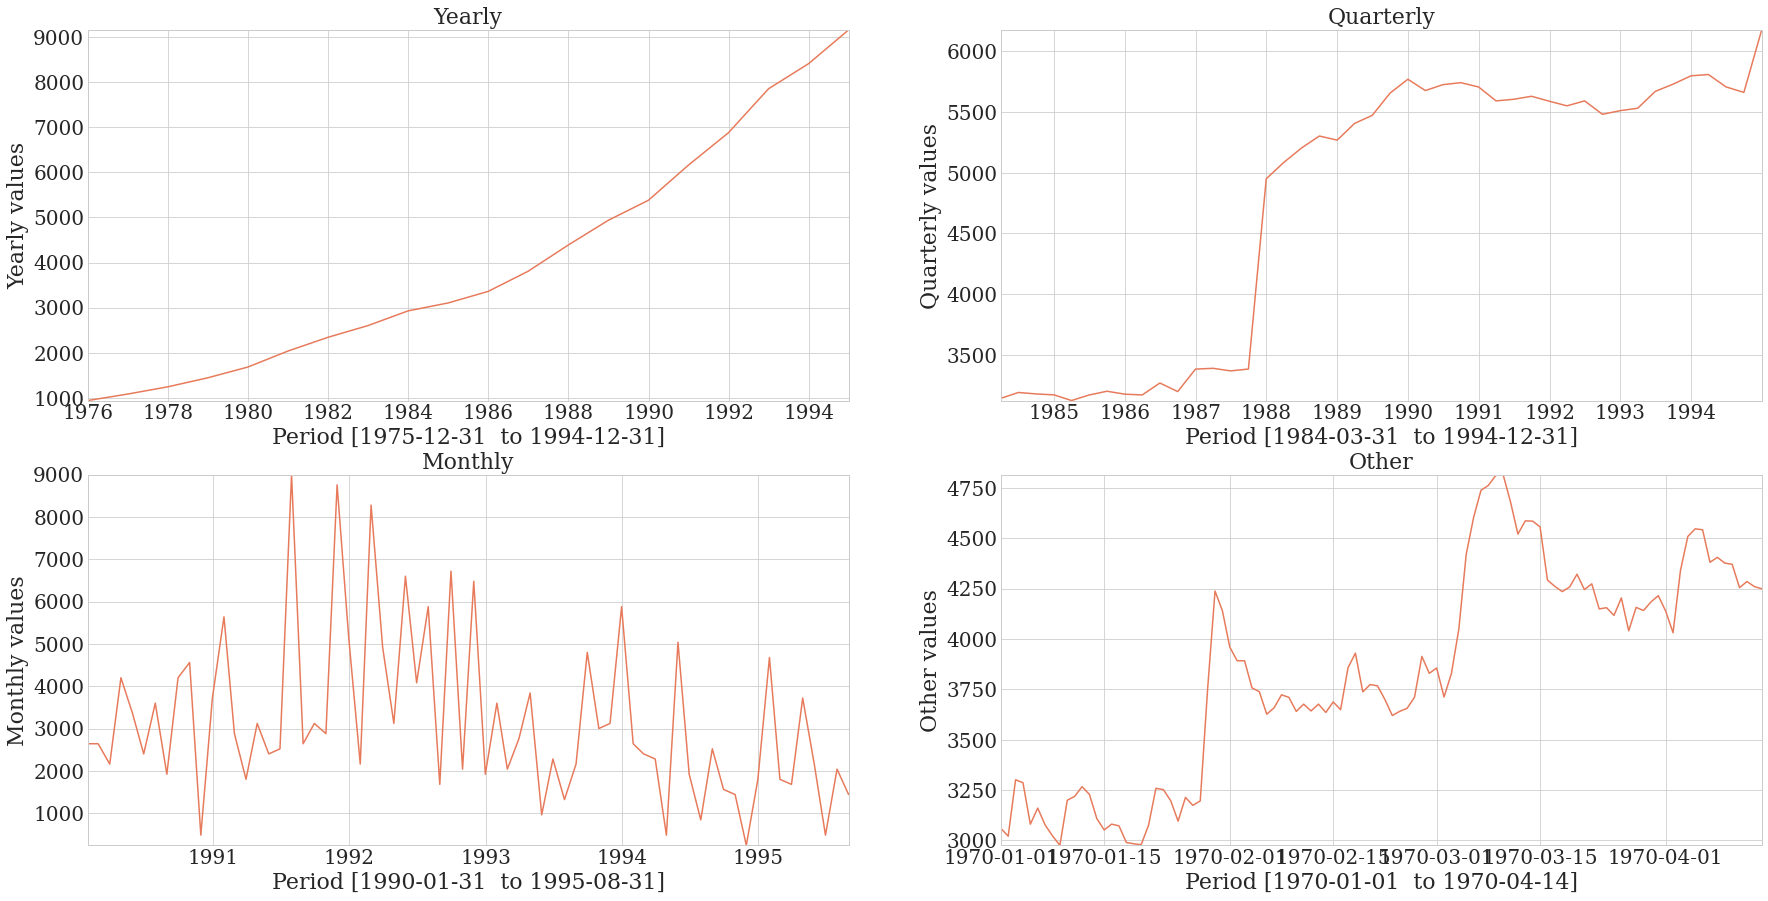

In [ ]:
from neuralforecast.data.datasets.m3 import M3, M3Info

dataset = ['Yearly', 'Quarterly', 'Monthly', 'Other']

fig = plt.figure(figsize=(30, 15))
fig.tight_layout()
rcParams['figure.figsize'] = 30, 15
ax0 = plt.subplot2grid((2,2),(0, 0))
ax1 = plt.subplot2grid((2,2),(0, 1))
ax2 = plt.subplot2grid((2,2),(1, 0))
ax3 = plt.subplot2grid((2,2),(1, 1))
axs = [ax0, ax1, ax2, ax3]

for idx, type in enumerate(dataset):
    Y_df, _, _ = M3.load(directory='data', group=type)

    x_plot = Y_df[Y_df.unique_id==type[0]+str(1)].ds.values 
    y_plot = Y_df[Y_df.unique_id==type[0]+str(1)].y.values 

    title_str = type
    x_axis_str = f'Period [{str(x_plot.min())[:10]}  to {str(x_plot.max())[:10]}]'
    y_axis_str = type + f' values'

    draw_plot(x_plot, y_plot, title_str, x_axis_str, y_axis_str, axs[idx], linecolor=COLOR_PALLETE[10])

plt.show()